## 0.Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import DBSCAN

## 1. Data Preprocessing

### 1.0. Data Loading

Ở phần này, chúng ta tiến hành load data từ file csv và thực hiện loại bỏ một số cột/dòng không cần thiết/không có ý nghĩa trong việc phân tích dữ liệu về sau, đồng thời cũng tiến hành đổi tên một số cột để thuận tiện truy xuất về sau.

In [2]:
df=pd.read_csv('data/Billionaires Statistics Dataset.csv')

In [3]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
df.shape

(2640, 35)

**Về Dataset:** dữ liệu là gồm 1 file csv có 2640 dòng và 35 cột ghi nhận thông tin về các tỷ phú hàng đầu trên thế giới và các chỉ số kinh tế, xã hội, và tài chính liên quan đến đất nước của họ.

**Mô tả các cột trong file csv:**

Rank: Xếp hạng của người giàu trong danh sách.

FinalWorth: Giá trị tài sản cuối cùng của họ (tính bằng tỷ đô la Mỹ).

Category: Lĩnh vực hoạt động kinh doanh của họ.

PersonName: Tên của người giàu.

Age: Tuổi của họ tính tới ngày 4/4/2023.

Country: Quốc gia mà họ đang sống.

City: Thành phố mà họ đang sống.

Source: Các nguồn thu nhập chính của họ.

Industries: Ngành công nghiệp mà họ liên quan đến.

CountryOfCitizenship: Quốc tịch của họ.

Organization: Tên tổ chức mà họ đang quản lý hoặc liên quan đến (nếu có).

SelfMade: Trạng thái tự tạo ra tài sản (TRUE hoặc FALSE).

Status: Trạng thái hôn nhân (D là độc thân, U là ly hôn).

Gender: Giới tính của họ (M là nam, F là nữ).

BirthDate: Ngày tháng năm sinh của họ.

LastName: Họ của họ.

FirstName: Tên của họ.

Title: Chức vụ hoặc vị trí chính trong tổ chức (nếu có).

Date: Ngày tháng năm mà dữ liệu này được cập nhật.

State: Tiểu bang hoặc khu vực (nếu có) mà họ đang sống.

ResidenceStateRegion: Khu vực hoặc vùng mà họ đang sống (nếu có).

BirthYear: Năm sinh của họ.

BirthMonth: Tháng sinh của họ.

BirthDay: Ngày sinh của họ.

CPI_country: Chỉ số giá tiêu dùng của quốc gia (nơi họ sống).

CPI_change_country: Thay đổi chỉ số giá tiêu dùng của quốc gia (nơi họ sống).

GDP_country: GDP của quốc gia (nơi họ sống).

Gross_tertiary_education_enrollment: Tỷ lệ đăng ký giáo dục đại học (nơi họ sống).

Gross_primary_education_enrollment_country: Tỷ lệ đăng ký giáo dục tiểu học (nơi họ sống).

Life_expectancy_country: Tuổi thọ trung bình (nơi họ sống).

Tax_revenue_country_country: Thuế thu được từ quốc gia (nơi họ sống).

Total_tax_rate_country: Tỷ lệ thuế tổng cộng (nơi họ sống).

Population_country: Dân số của quốc gia (nơi họ sống).

Latitude_country: Vĩ độ của quốc gia (nơi họ sống).

Longitude_country: Kinh độ của quốc gia (nơi họ sống).

In [5]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


### 1.1. Data cleaning

#### 1.1.1. Missing values

Kiểm tra missing value trên tất cả các cột.



In [6]:
df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [7]:
print(f'Số dòng của df: {df.shape[0]:,}')


Số dòng của df: 2,640


### 1.1.2. Duplicated values

In [8]:
df.duplicated().sum()


0

Nhận thấy không có dữ liệu nào bị trùng. Vì vậy ta sẽ bỏ qua bước này.

### 1.1.3. Imputing the data

In [9]:
df['state'].unique()


array([nan, 'Texas', 'Washington', 'Hawaii', 'Nebraska', 'New York',
       'California', 'Kansas', 'Arkansas', 'Oregon', 'Virginia',
       'Wyoming', 'Nevada', 'Florida', 'Pennsylvania', 'Massachusetts',
       'Illinois', 'Tennessee', 'Connecticut', 'Oklahoma', 'Michigan',
       'Wisconsin', 'Colorado', 'Indiana', 'New Hampshire', 'Georgia',
       'Missouri', 'New Jersey', 'North Carolina', 'Iowa', 'Kentucky',
       'Maryland', 'Montana', 'Ohio', 'South Carolina', 'Arizona',
       'Louisiana', 'Utah', 'Rhode Island', 'Idaho',
       'U.S. Virgin Islands', 'Minnesota', 'Maine', 'Mississippi',
       'South Dakota', 'Alabama'], dtype=object)

In [10]:
df['residenceStateRegion'].unique()

array([nan, 'South', 'West', 'Midwest', 'Northeast', 'U.S. Territories'],
      dtype=object)

In [11]:
print(df['birthDate'].value_counts())
print("Max Value: ", df['birthDate'].value_counts().idxmax())

1/1/1965 0:00     19
1/1/1962 0:00     16
1/1/1966 0:00     15
1/1/1967 0:00     15
1/1/1971 0:00     15
                  ..
5/6/2004 0:00      1
2/26/1957 0:00     1
9/14/1946 0:00     1
5/5/1935 0:00      1
11/1/1956 0:00     1
Name: birthDate, Length: 2060, dtype: int64
Max Value:  1/1/1965 0:00


In [12]:
df['birthMonth'].mode()

0    1.0
Name: birthMonth, dtype: float64

In [13]:
dfC=df.copy()

In [14]:
dfC['country'].fillna(dfC['country'].mode().iloc[0], inplace=True)
dfC['city'].fillna(dfC['city'].mode().iloc[0], inplace=True)
dfC['age'].fillna(dfC['age'].median(), inplace=True)
dfC['title'].fillna('Not Specified', inplace=True)
dfC['organization'].fillna('Not Specified', inplace=True)
dfC['residenceStateRegion'].fillna('Not Specified', inplace=True)
dfC['state'].fillna('Not Specified', inplace=True)
dfC['birthDate'].fillna(df['birthDate'].value_counts().idxmax(), inplace=True)
name_mapping = {
    'Tahir': 'Muhammad',
    'Jay-Z': 'Shawn',
    'Rihanna': 'Robyn'
}
for last_name, first_name in name_mapping.items():
    dfC.loc[dfC['lastName'] == last_name, 'firstName'] = first_name

dfC['birthYear'].fillna(dfC['birthYear'].mean(), inplace=True)
dfC['birthMonth'].fillna(dfC['birthMonth'].mode().iloc[0], inplace=True)
dfC['birthDay'].fillna(dfC['birthDay'].mode().iloc[0], inplace=True)
dfC['cpi_country'].fillna(dfC['cpi_country'].mean(), inplace=True)
dfC['cpi_change_country'].fillna(dfC['cpi_change_country'].mean(), inplace=True)
dfC['gross_tertiary_education_enrollment'].fillna(dfC['gross_tertiary_education_enrollment'].mean(), inplace=True)
dfC['gross_primary_education_enrollment_country'].fillna(dfC['gross_primary_education_enrollment_country'].mean(), inplace=True)
dfC['life_expectancy_country'].fillna(dfC['life_expectancy_country'].mean(), inplace=True)
dfC['tax_revenue_country_country'].fillna(dfC['tax_revenue_country_country'].mean(), inplace=True)
dfC['total_tax_rate_country'].fillna(dfC['total_tax_rate_country'].mean(), inplace=True)
dfC['population_country'].fillna(dfC['population_country'].median(), inplace=True)
dfC['latitude_country'].fillna(dfC['latitude_country'].median(), inplace=True)
dfC['longitude_country'].fillna(dfC['longitude_country'].median(), inplace=True)

In [15]:
dfC['gdp_country'] = dfC['gdp_country'].astype(str).str.replace('[\$,]', '', regex=True)
dfC['gdp_country'] = pd.to_numeric(dfC['gdp_country'], errors='coerce')
dfC['gdp_country'].fillna(dfC['gdp_country'].mean(), inplace=True)

In [16]:
dfC.isnull().sum()

rank                                          0
finalWorth                                    0
category                                      0
personName                                    0
age                                           0
country                                       0
city                                          0
source                                        0
industries                                    0
countryOfCitizenship                          0
organization                                  0
selfMade                                      0
status                                        0
gender                                        0
birthDate                                     0
lastName                                      0
firstName                                     0
title                                         0
date                                          0
state                                         0
residenceStateRegion                    

In [17]:
dfC.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

### 1.1.4 Distribution

In [18]:
dfC.columns.unique()

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [19]:
dfC_num_plot=dfC.select_dtypes(include= ["int","float"]).drop(columns=["rank","cpi_change_country", "birthYear", "birthMonth","birthDay", "population_country", "latitude_country", "longitude_country"])
dfC_cat_plot = dfC.select_dtypes(include= ["object"]).drop(columns=["personName", "title", "state", "residenceStateRegion"])

In [20]:
numeric = dfC_num_plot
categoric = dfC_cat_plot

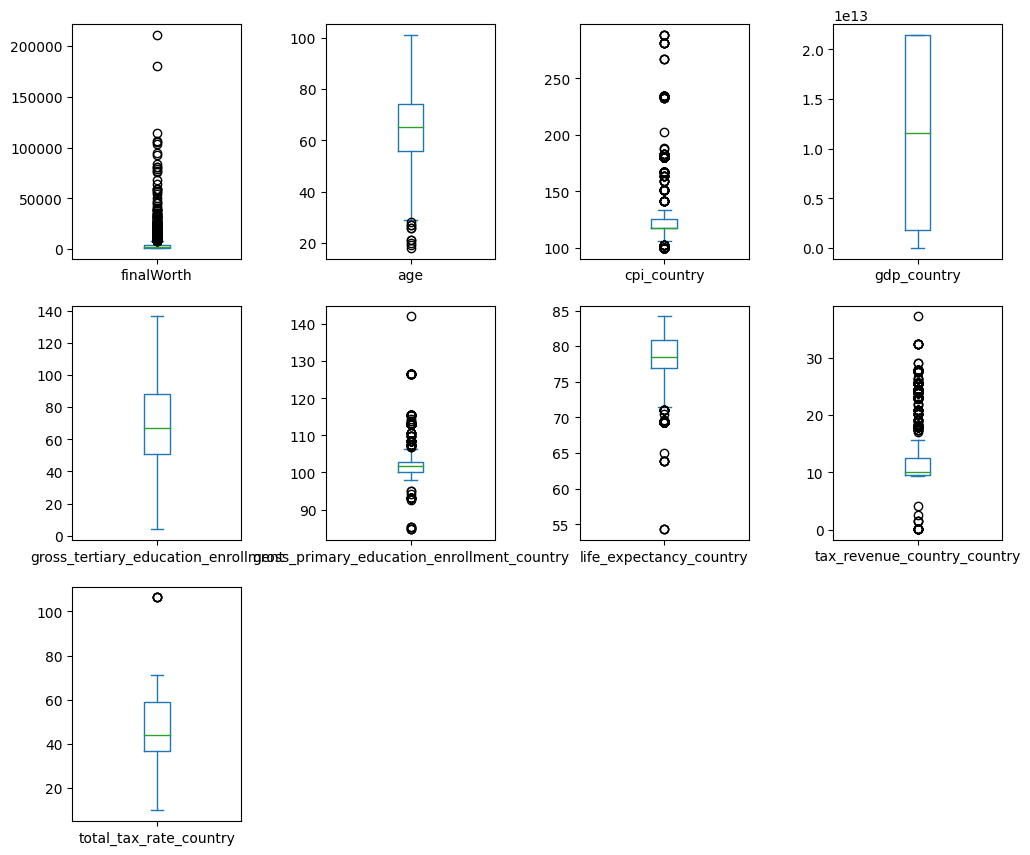

In [21]:
numeric.plot(subplots=True, layout=(4,4), kind="box", figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

C:\Users\DLCH\AppData\Local\Temp\ipykernel_5040\1321649465.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dfC.hist(bins=50, ax=ax, layout=(4,4), column=numeric_plot)


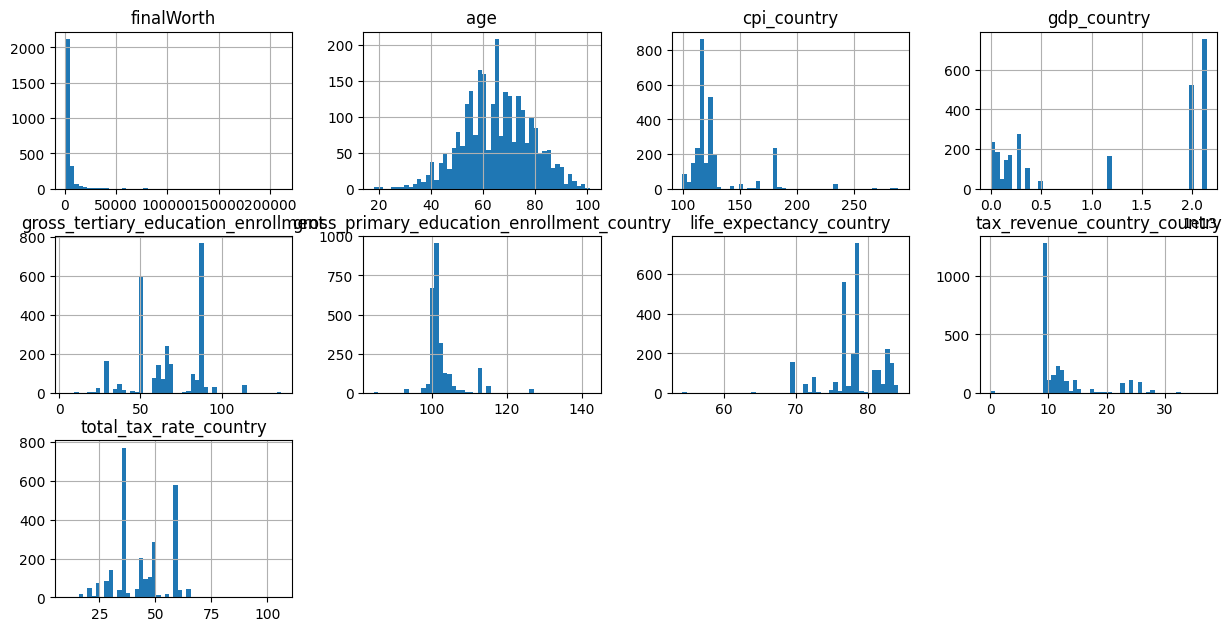

In [22]:
numeric_plot= dfC_num_plot.columns

fig = plt.figure(figsize=(15,10))
ax = plt.gca()

dfC.hist(bins=50, ax=ax, layout=(4,4), column=numeric_plot)
plt.tight_layout
plt.show()


Dữ liệu phân bố hợp lí.

## 2. Data Analyzing and Visulization

### 2.1 Wealth Distribution 

**Sự phân bố tài sản của các tỷ phú như thế nào?**


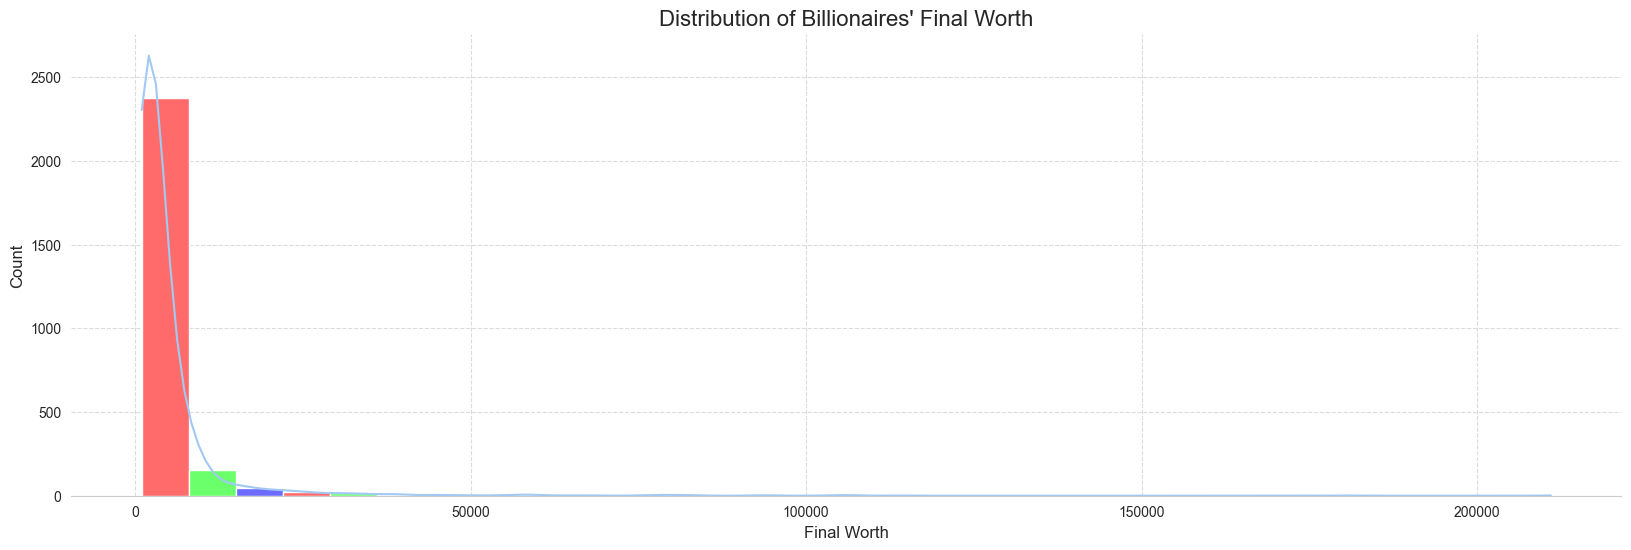

In [23]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(20, 6))
sns.histplot(data=dfC, x='finalWorth', bins=30, kde=True)
plt.title('Distribution of Billionaires\' Final Worth', fontsize=16)
plt.xlabel('Final Worth', fontsize=12)
plt.ylabel('Count', fontsize=12)

sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

colors = ['#FF6B6B', '#6BFF6B', '#6B6BFF']
for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(colors[i % len(colors)])

plt.show()


**Có bao nhiêu tỷ phú tự thân và được thừa kế tài sản?**

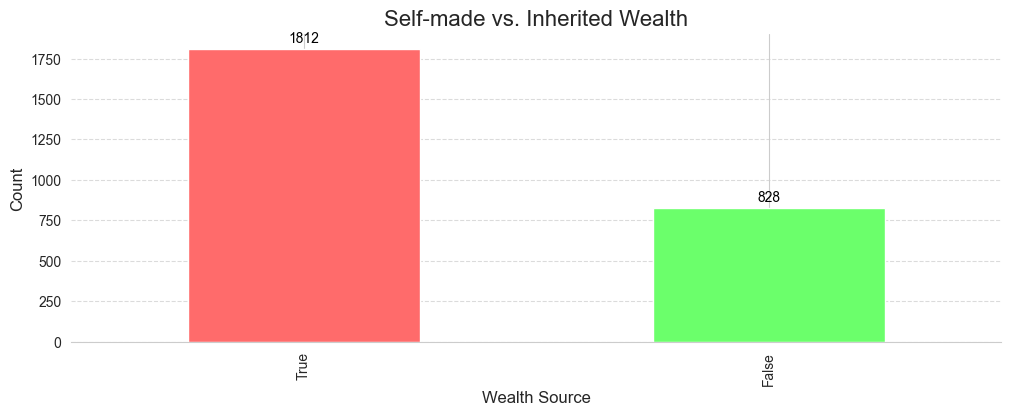

In [24]:
colors = ['#FF6B6B', '#6BFF6B']

plt.figure(figsize=(12, 4))
dfC['selfMade'].value_counts().plot(kind='bar', color=colors)
plt.title('Self-made vs. Inherited Wealth', fontsize=16)
plt.xlabel('Wealth Source', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, v in enumerate(dfC['selfMade'].value_counts()):
    plt.text(i, v + 20, str(v), color='black', ha='center', va='bottom')

sns.set_style("whitegrid")
sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Trong 2640 tỷ phú trong danh sách có 1812 người tự thân và 828 người được thừa kế.

**Có bất kỳ xu hướng hoặc mô hình tích lũy tài sản nào dựa trên giới tính không?**

Text(0, 0.5, 'Final Worth')

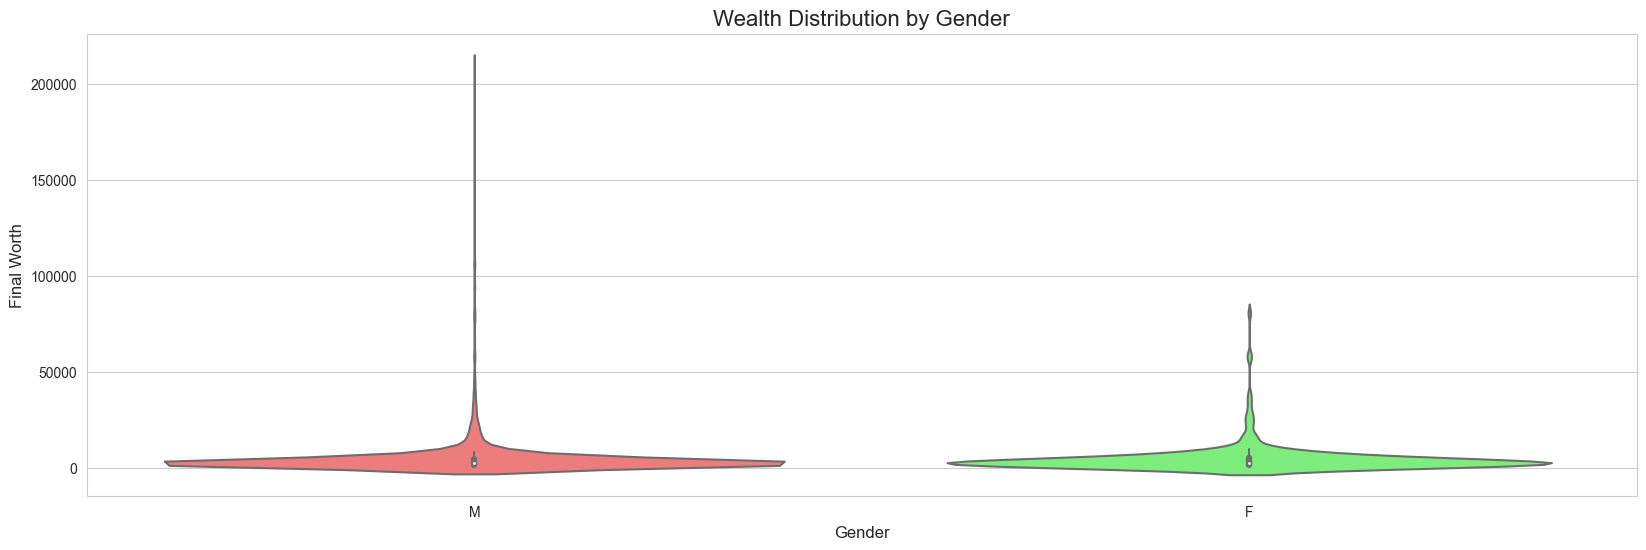

In [25]:
colors = ['#FF6B6B', '#6BFF6B']

plt.figure(figsize=(20, 6))
sns.violinplot(data=dfC, x='gender', y='finalWorth', palette=colors)
plt.title('Wealth Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Final Worth', fontsize=12)

Ở nữ có sự tích lũy tài sản nhiều hơn từ 0 đến dưới 100000. Tuy nhiên khi tài sản lớn hơn thì phần lớn tỷ phú có giới tính nam.

**Sự phân bố độ tuổi các tỷ phú như thế nào?**

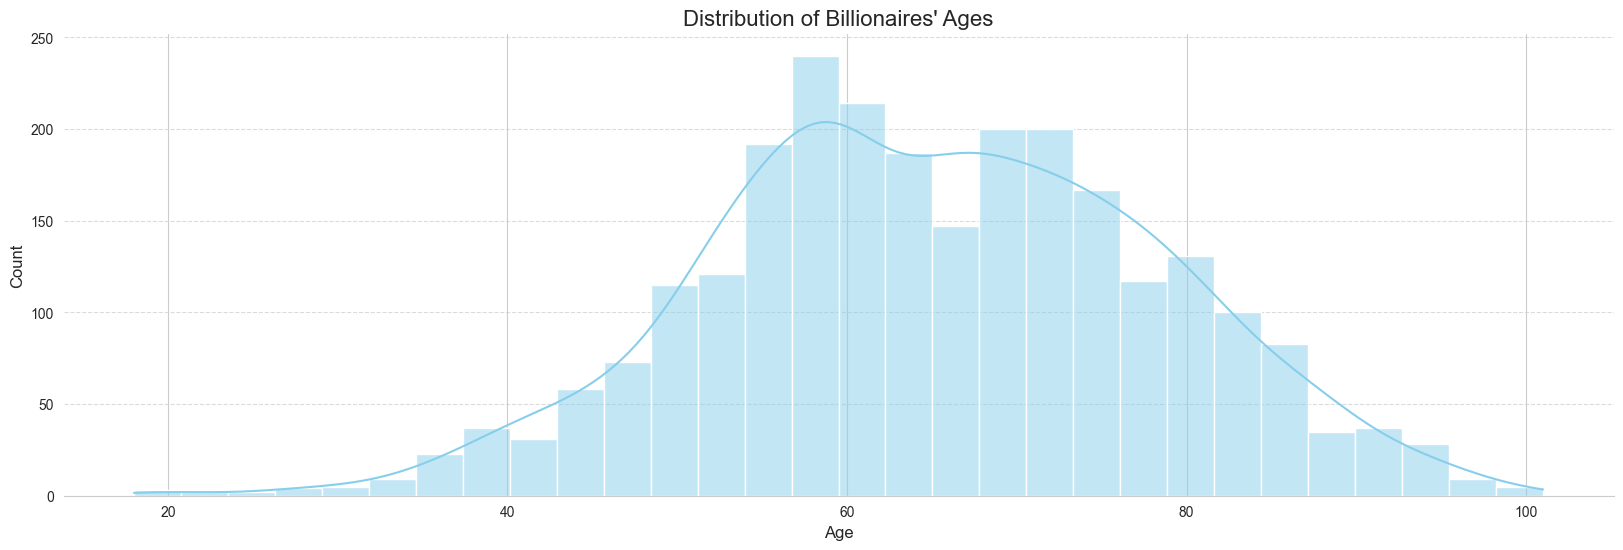

In [26]:
plt.figure(figsize=(20, 6))
sns.histplot(data=df[dfC['age'].notnull()], x='age', bins=30, color='skyblue', kde=True)
plt.title('Distribution of Billionaires\' Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

sns.set_style("whitegrid")
sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Tìm hiểu sâu hơn về vấn đề độ tuổi đối với tài sản của các tỷ phú**

Text(0, 0.5, 'Count')

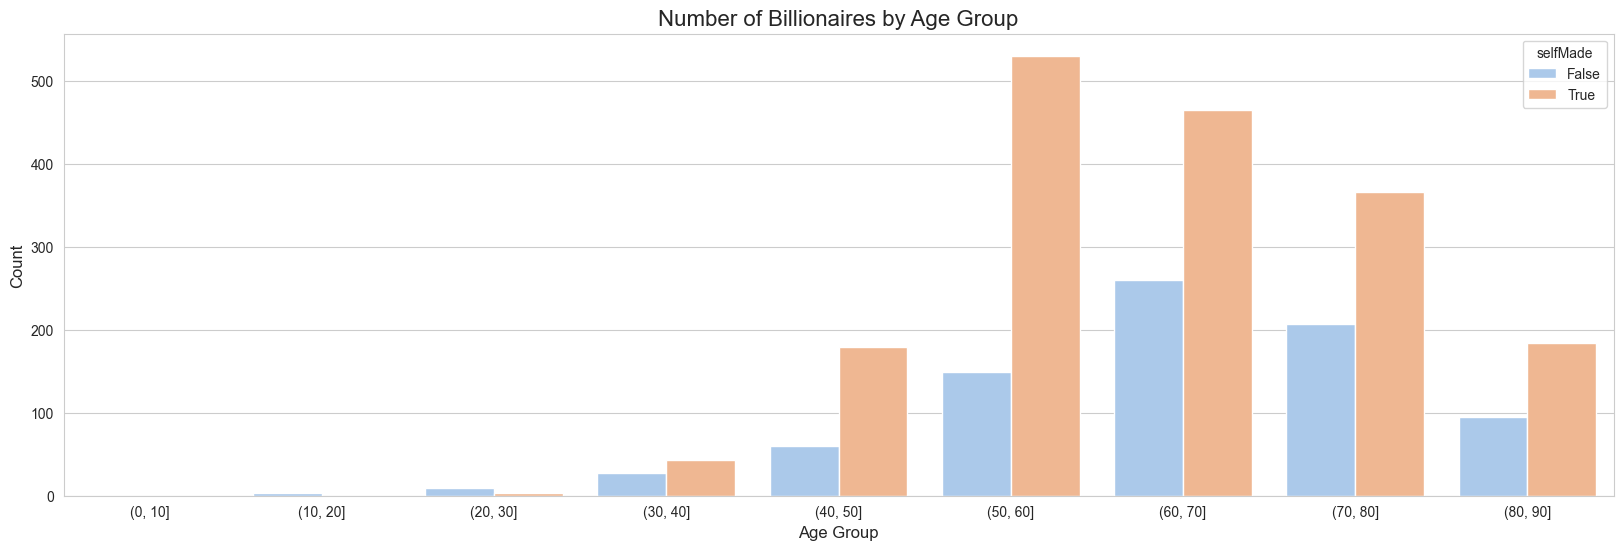

In [27]:
dfC['age_group'] = pd.cut(dfC['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.figure(figsize=(20, 6))
sns.countplot(data=dfC, x='age_group', hue='selfMade')
plt.title('Number of Billionaires by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

Chúng ta có thể suy ra từ biểu đồ đầu tiên, rằng những người trên 80 tuổi có mức tài sản trung bình cao hơn, nhưng các nhóm tuổi khác có mức tài sản trung bình gần như tương tự, trong đó nhóm tuổi 40-50 có mức tài sản trung bình thấp nhất.
Điều thú vị là, từ biểu đồ thứ hai, chúng ta có thể thấy rằng những người trên 90 tuổi có ít cổ phần gia đình hơn và những người trẻ tuổi không có tài sản chung của gia đình.
Những người dưới 40 tuổi cũng có số cổ phần gia đình ít hơn, trong khi những người ở độ tuổi từ 50-90 có số cổ phần gia đình cao nhất.

**Top 10 quốc gia có nhiều tỷ phú nhất**

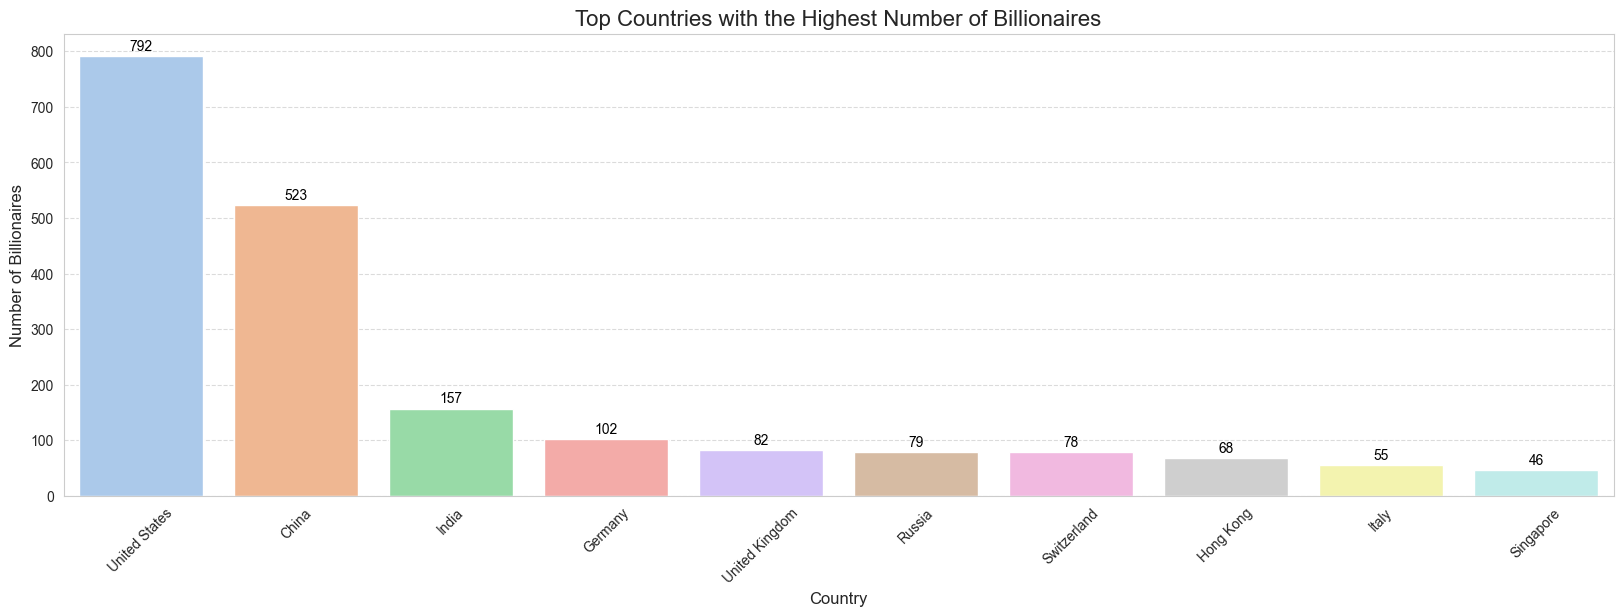

In [28]:
top_countries =  dfC['country'].value_counts().head(10)

colors = sns.color_palette("pastel")

plt.figure(figsize=(20, 6))
sns.barplot(x=top_countries.index, y=top_countries, palette=colors)
plt.title('Top Countries with the Highest Number of Billionaires', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(top_countries):
    plt.text(i, v + 5, str(v), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

Mỹ và Trung Quốc có số lượng tỷ phú vượt trội hơn các nước còn lại.

**Phân bố các tỷ phú dựa theo tháng sinh?**

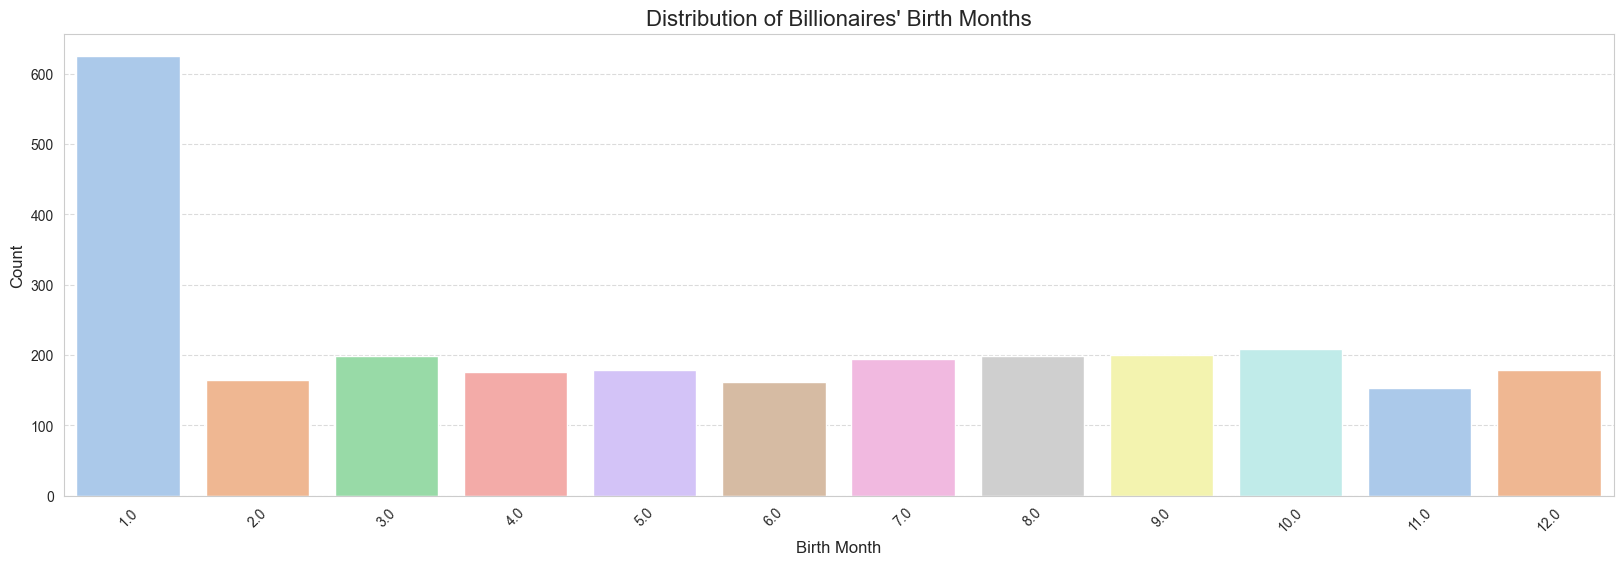

In [29]:
plt.figure(figsize=(20, 6))
sns.countplot(data=dfC, x='birthMonth', palette='pastel')
plt.title('Distribution of Billionaires\' Birth Months', fontsize=16)
plt.xlabel('Birth Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Tháng 1 có nhiều người sinh nhất, có thể nói là vượt trội hơn so với các tháng còn lại.

### 2.2. Source of Wealth


**Có ngành nào chiếm ưu thế về số lượng tỷ phú đại diện không?**

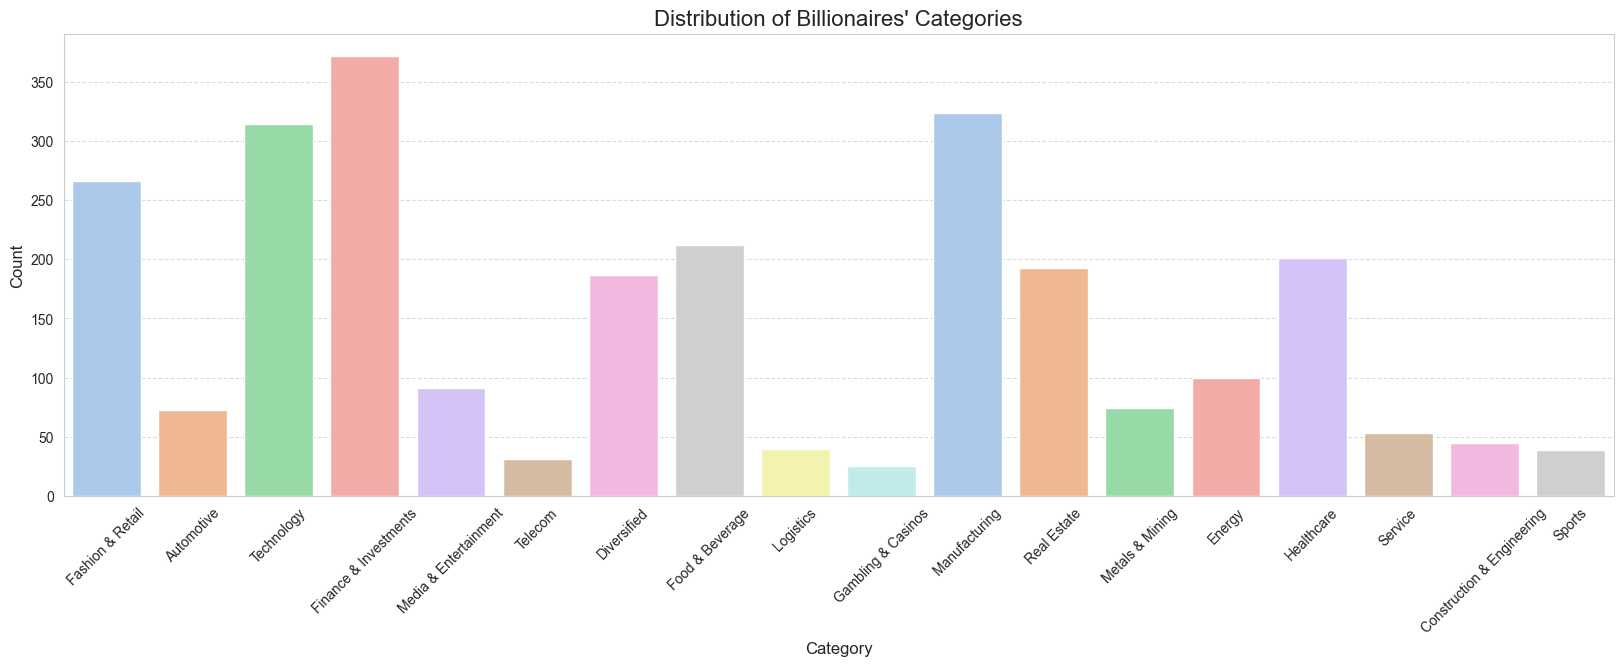

In [30]:
plt.figure(figsize=(20, 6))
sns.countplot(data=dfC, x='category', palette='pastel')
plt.title('Distribution of Billionaires\' Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Các ngành như tài chính, công nghệ, chế tác và thời trang có ưu thế về số lương tỷ phú so với các ngành còn lại.

**Nguồn tài sản của các tỷ phú chủ yếu trong lĩnh vực gì?**

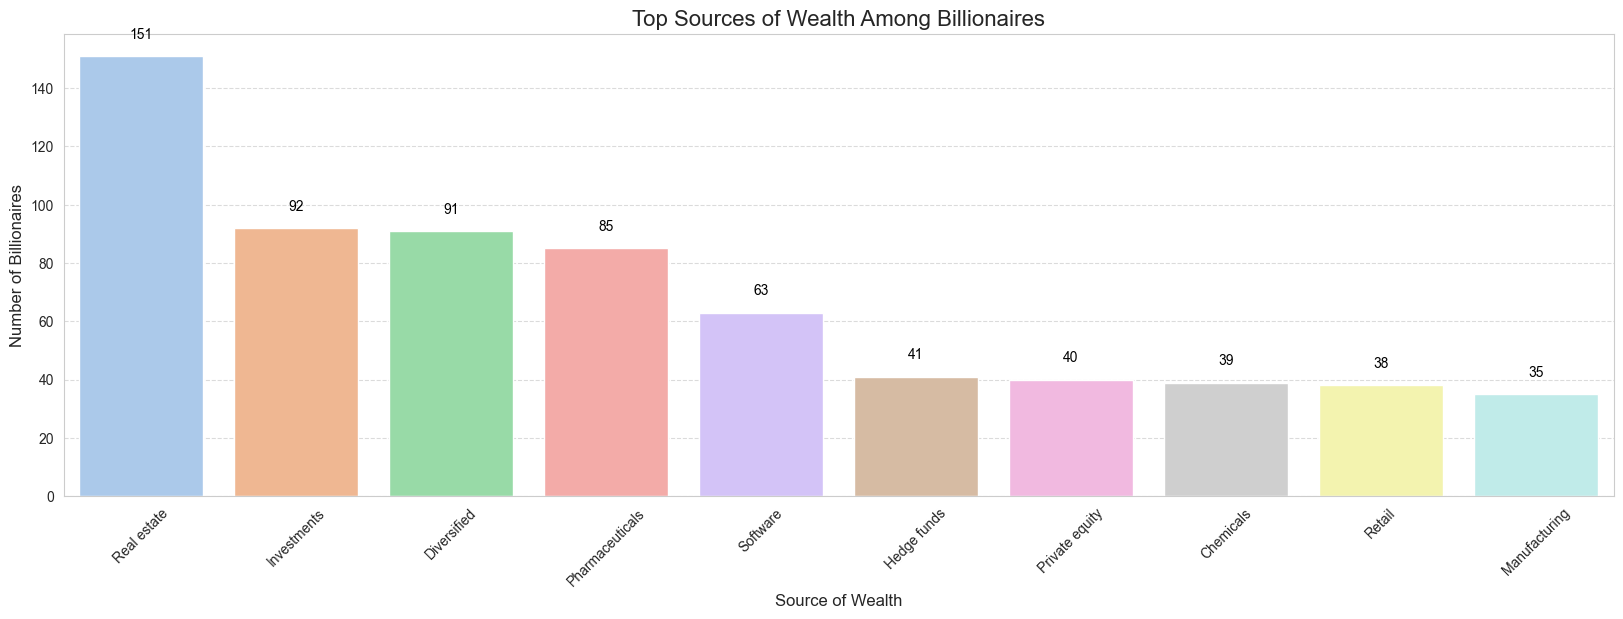

In [31]:
top_sources = dfC['source'].value_counts().head(10)

colors = sns.color_palette("pastel")

plt.figure(figsize=(20, 6))
sns.barplot(x=top_sources.index, y=top_sources, palette=colors)
plt.title('Top Sources of Wealth Among Billionaires', fontsize=16)
plt.xlabel('Source of Wealth', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(top_sources):
    plt.text(i, v + 5, str(v), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

Như đã tìm hiểu ở trên, ngành Finance & Investments tập trung nhiều tỷ phủ, do đó phần nào cũng dự đoán được tài sản của họ đến từ Real estate và Investments.

### 2.3 Geographic Analysis

In [32]:
country_count = dfC['country'].value_counts().reset_index()
country_count.columns = ['country', 'count']

country_count.head()

,country,count
0,United States,792
1,China,523
2,India,157
3,Germany,102
4,United Kingdom,82


Do nước Mỹ có số lượng tỷ phú vượt trội, nên ở phần này ta sẽ tập trung vào đất nước này.

**Có tồn tại khu vực hoặc tiểu bang nào có số lượng tỷ phú nhiều hơn không?**

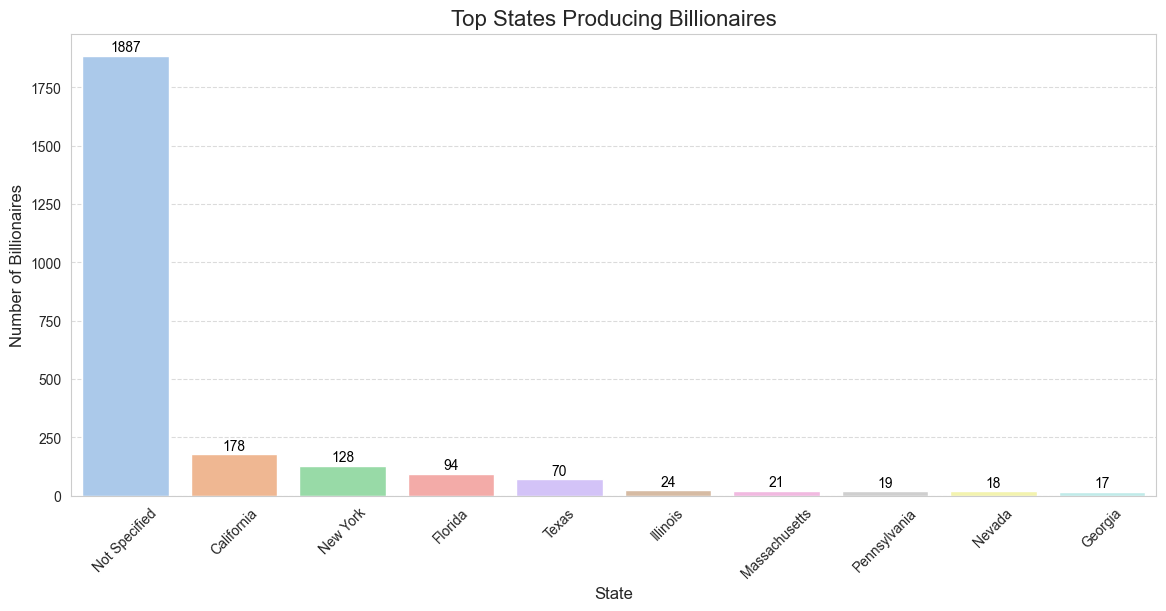

In [33]:
state_counts = dfC['state'].value_counts()

top_states = state_counts.head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_states.index, y=top_states, palette=colors)
plt.title('Top States Producing Billionaires', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels above the bars
for i, v in enumerate(top_states):
    plt.text(i, v + 5, str(v), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

California và New York có số lượng nhiều hơn so với các tiểu bang khác (hơn 100 người).

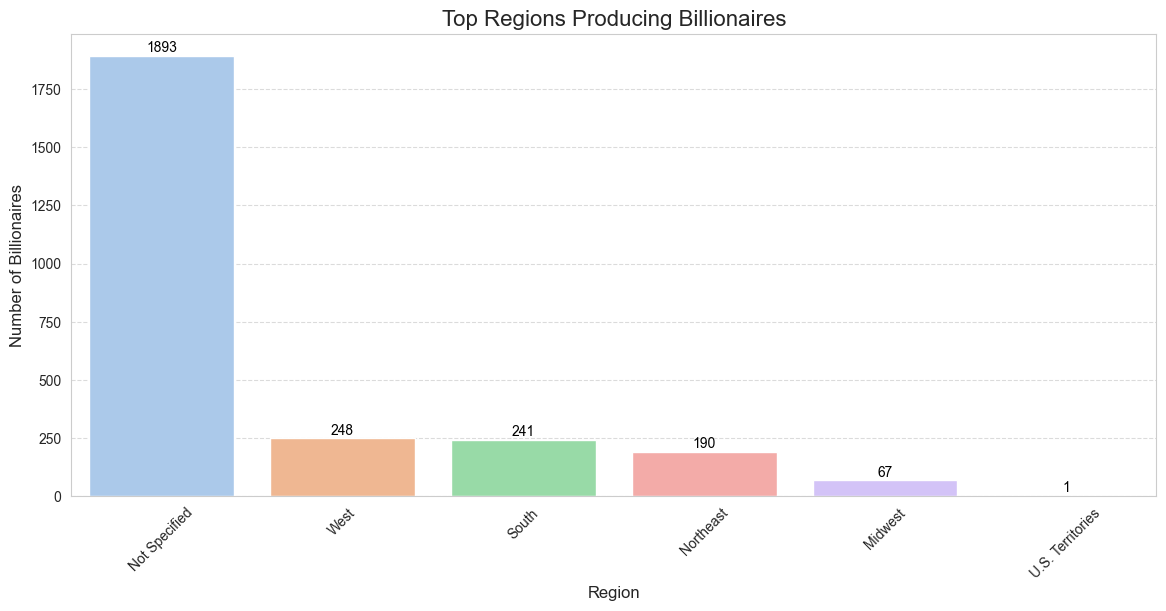

In [34]:
region_counts = dfC['residenceStateRegion'].value_counts()

top_regions = region_counts.head(10)

colors = sns.color_palette("pastel")

plt.figure(figsize=(14, 6))
sns.barplot(x=top_regions.index, y=top_regions, palette=colors)
plt.title('Top Regions Producing Billionaires', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(top_regions):
    plt.text(i, v + 5, str(v), color='black', ha='center', va='bottom', fontsize=10)

plt.show()

Các tỷ phú tập trung chủ yếu ở các khu vực như: West, South, Northeast và Midwest.

**Tổng GDP của một quốc gia liên quan như thế nào đến số lượng tỷ phú?**

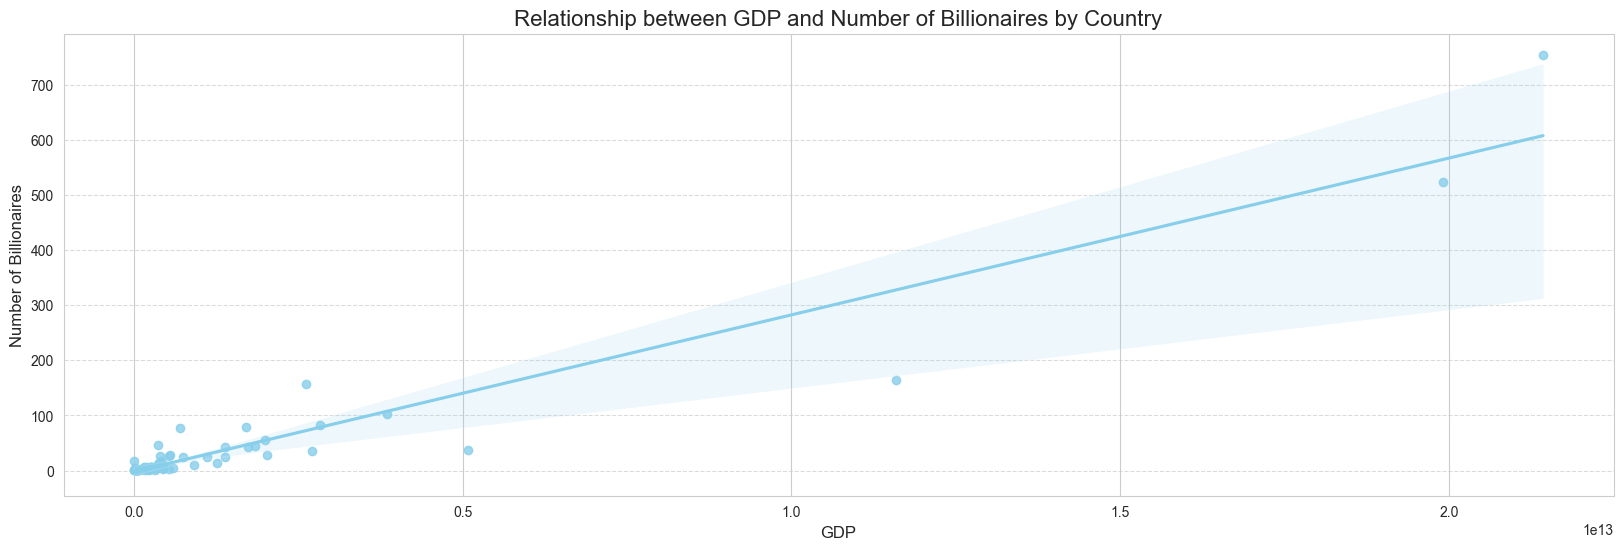

In [35]:
gdp_billionaires = dfC.groupby('gdp_country')['rank'].count().reset_index()

sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(20, 6))
sns.regplot(data=gdp_billionaires, x='gdp_country', y='rank', color='skyblue')
plt.title('Relationship between GDP and Number of Billionaires by Country', fontsize=16)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Giữa GDP và số lượng tỷ phú có mối quan hệ tương quan dương.

**Mối tương quan giữa chi phí sinh hoạt (CPI) và số lượng tỷ phú là gì?**

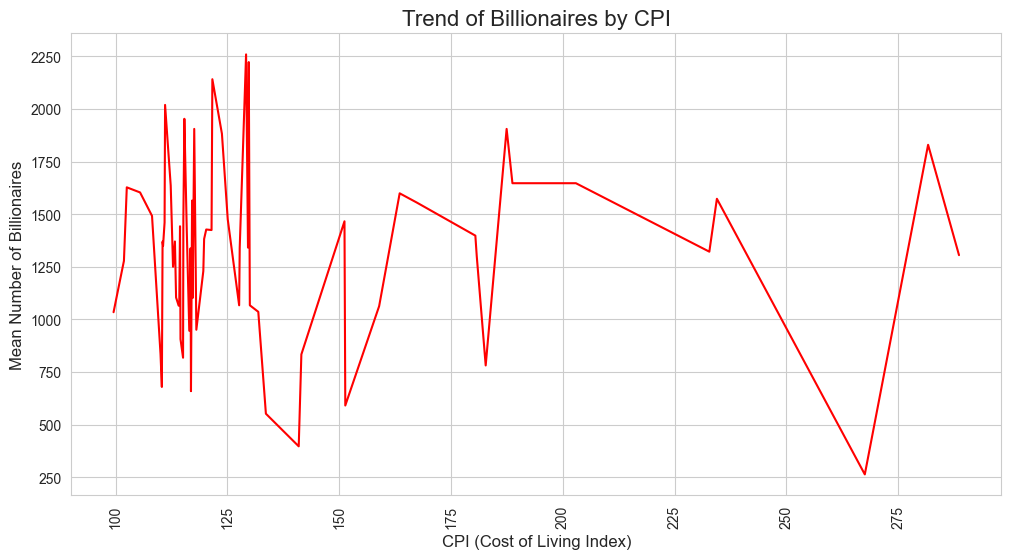

In [36]:
cpi_billionaires = dfC.groupby('cpi_country')['rank'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cpi_billionaires, x='cpi_country', y='rank', color='red')
plt.title('Trend of Billionaires by CPI', fontsize=16)
plt.xlabel('CPI (Cost of Living Index)', fontsize=12)
plt.ylabel('Mean Number of Billionaires', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Có thể thấy rằng chi phí sinh hoạt không ảnh hưởng đến số lượng tỷ phú.

**Tìm hiểu về mối quan hệ giữa tỷ lệ đăng ký giáo dục và số lượng tỷ phú**

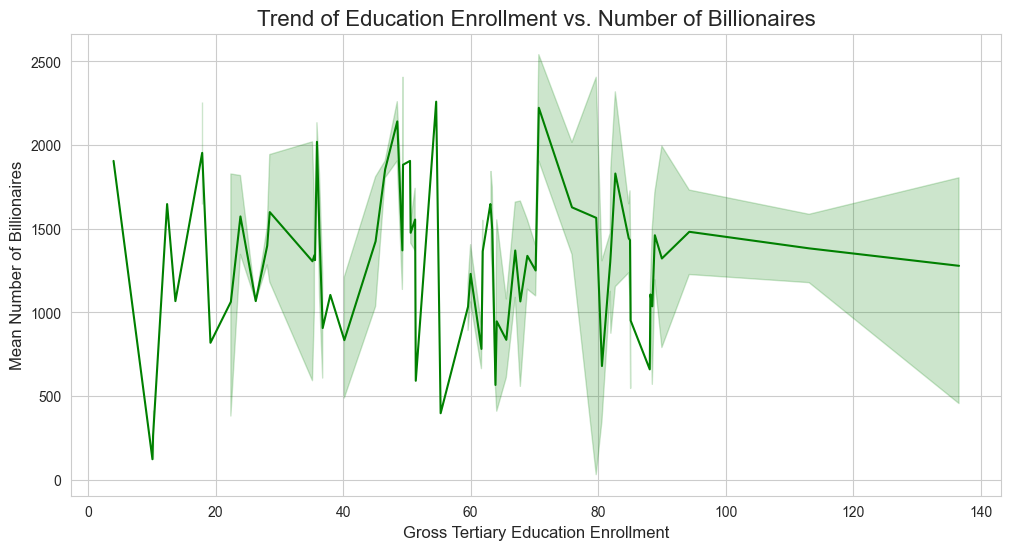

In [37]:
education_correlation = dfC['gross_tertiary_education_enrollment'].corr(df['rank'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='gross_tertiary_education_enrollment', y='rank', color='green')
plt.title('Trend of Education Enrollment vs. Number of Billionaires', fontsize=16)
plt.xlabel('Gross Tertiary Education Enrollment', fontsize=12)
plt.ylabel('Mean Number of Billionaires', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Nhận thấy tỷ lệ đăng ký giáo dục và số tỷ phú thay đổi không ổn định theo thời gian, tuy không tăng mạnh nhưng vẫn giữ ở mức cao. Từ đó cho thấy rằng giáo dục có ảnh hưởng lớn tới số lượng tỷ phú ở các quốc gia.

**Mối tương quan của các tỷ phú hàng đầu với chỉ số HDI của quốc gia**

Đầu tiên ta sẽ tính chỉ số HDI của quốc gia dựa trên dữ liệu từ các cột gdp_country, gross_primary_education_enrollment_country and life_expectancy_country.

In [38]:
dfC["hdi"] = (dfC["gdp_country"] + dfC["gross_primary_education_enrollment_country"] + dfC["life_expectancy_country"])/3
dfC["hdi"]

0       9.051728e+11
1       7.142567e+12
2       7.142567e+12
3       7.142567e+12
4       7.142567e+12
            ...     
2635    6.636667e+12
2636    7.142567e+12
2637    6.636667e+12
2638    6.636667e+12
2639    1.255985e+11
Name: hdi, Length: 2640, dtype: float64

Sau đây chúng ta sẽ tìm hiểu mối tương quan của 10 tỷ phú hàng đầu với chỉ số này ở quốc gia của họ.

Text(0, 0.5, 'Wealth')

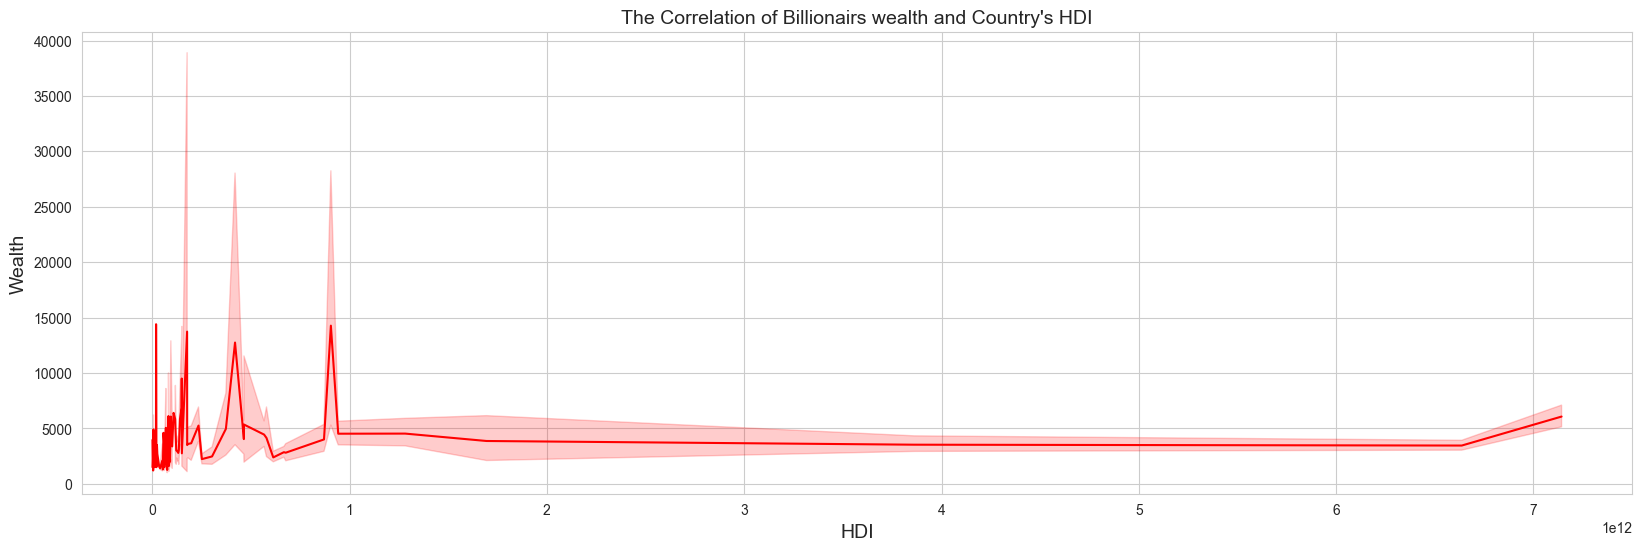

In [39]:
top_hdi = dfC["hdi"].value_counts().head(10)
top_finalWorth = dfC["finalWorth"].value_counts().head(10)

plt.figure(figsize=(20,6))
sns.lineplot(data=dfC, x="hdi", y="finalWorth", color="red")
plt.title("The Correlation of Billionairs wealth and Country's HDI", fontsize=14)
plt.xlabel("HDI", fontsize=14)
plt.ylabel("Wealth", fontsize=14)

Nhận thấy không có sự tương quan giữa chỉ số phát triển con người của một quốc gia so với sự giàu có của các tỷ phú.

**Mức thuế trung bình ở các quốc gia có nhiều tỷ phú**

In [40]:
top_countries_billionaires = dfC['country'].value_counts().head(10).index
average_tax_rate = dfC[dfC['country'].isin(top_countries_billionaires)]['total_tax_rate_country'].mean()

print(f'Average Total Tax Rate in Countries with the Most Billionaires: {average_tax_rate:.2f}')

Average Total Tax Rate in Countries with the Most Billionaires: 44.71


**Tương quan giữa dân số và số lượng tỷ phú của một quốc gia**

In [41]:
population_correlation = dfC['population_country'].corr(dfC['rank'])

print(f'Correlation between Population and Number of Billionaires: {population_correlation:.2f}')

Correlation between Population and Number of Billionaires: 0.11


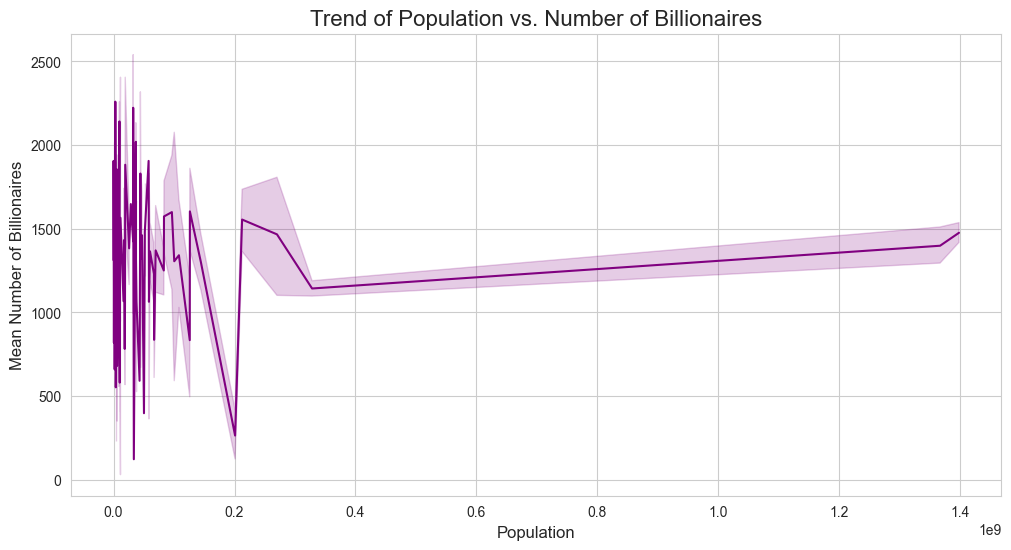

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfC, x='population_country', y='rank', color='purple')
plt.title('Trend of Population vs. Number of Billionaires', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Mean Number of Billionaires', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Khi dân số của một quốc gia tăng lên, số lượng tỷ phú có xu hướng tăng nhẹ. Tuy nhiên, mối tương quan tương đối yếu, cho thấy rằng riêng dân số có thể không phải là yếu tố dự báo mạnh mẽ về số lượng tỷ phú ở một quốc gia. Các yếu tố khác có thể góp phần vào mối quan hệ này.

### 2.2.4 Spatial Analysis


**Trực quan hóa vị trí của các tỷ phú trên bản đồ**

In [43]:
m = folium.Map(location=[0, 0], zoom_start=2)

marker_cluster = MarkerCluster()

for index, row in dfC.iterrows():
    if not pd.isna(row['latitude_country']) and not pd.isna(row['longitude_country']):
        folium.Marker([row['latitude_country'], row['longitude_country']]).add_to(marker_cluster)

marker_cluster.add_to(m)

m

**Tiếp theo, ta tìm hiểu xem sự phân bố các tỷ phủ ở các khu vực hay thành phố nhất định nào đó**

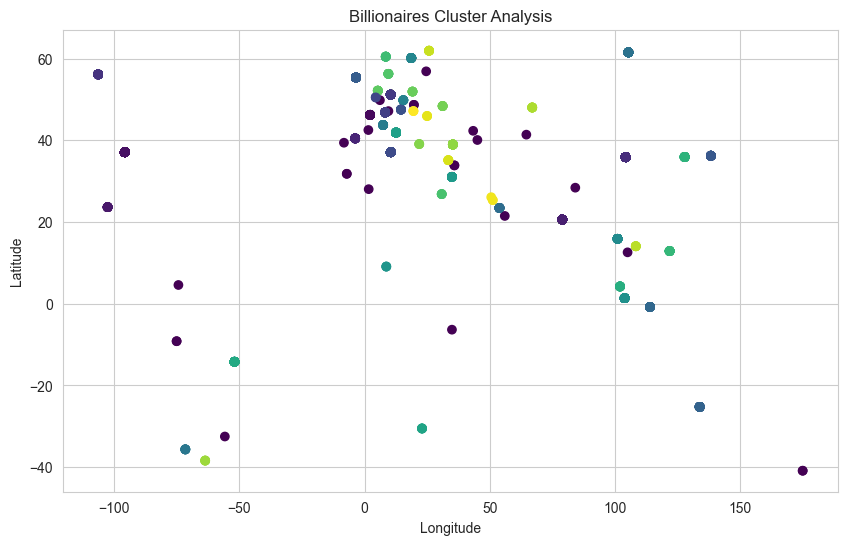

In [44]:
valid_locations = dfC.dropna(subset=['latitude_country', 'longitude_country'])

locations = valid_locations[['latitude_country', 'longitude_country']]

dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(locations)

valid_locations['cluster'] = dbscan.labels_

plt.figure(figsize=(10, 6))
plt.scatter(valid_locations['longitude_country'], valid_locations['latitude_country'], c=valid_locations['cluster'], cmap='viridis')
plt.title('Billionaires Cluster Analysis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Các tỷ phú tập trung trong khoảng từ vĩ độ 20-60 và từ kinh độ 0-50.

**Cuối cùng, tỷ phú chiếm bao nhiêu phần trăm tài sản thế giới**

Biết rằng tổng tài sản cả thế giới là 514.017 tỷ USD (số liệu năm 2023)

In [45]:
total_billionaires_wealth = total_billionaires_wealth = dfC['finalWorth'].sum() 
total_world_wealth = 514017000000

percentage_of_wealth_held_by_billionaires = (total_billionaires_wealth / total_world_wealth) * 100
percentage_of_wealth_held_by_billionaires

0.0023747852697478876

Các tỷ phú tuy sở hữu tài sản rất lớn nhưng chỉ chiếm vỏn vẹn 0.002% tổng tài sản thế giới.

## 3. License

This Notebook has been released under the Apache 2.0 open source license.